# 경사하강법

## 핵심 주제

1. 경사하강법 의미
1. 그레이디언트 계산
1. 경사하강법과 선형회귀
1. 미니배치
1. 경사하강법

## 필수 모듈 임포트

이전에 정의한 함수를 사용하기 위한 준비가 필요하며,
이전에 사용한 모든 파이썬 코드가 `../scratch/` 디렉토리에 저장되어 있다고 가정한다.

여기서는 선형대수 모듈에 포함되어 있는 `Vector` 자료형과 `dot` (벡터곱)함수를 불러온다.

* `Vector = List[float]`
* `dot(v:Vector, w:Vector) -> float`

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

# 선형대수 모듈로부터 Vector 자료형과 dot 함수 불러오기
from scratch.linear_algebra import Vector, dot

## 핵심 1: 경사하강법 의미

주어진 데이터셋을 가장 잘 반영하는 최적의 수학적 모델을 찾으려 할 때 가장 기본적으로 사용되는 기법이
**경사하강법**(gradient descent)이다.
최적의 모델에 대한 기준은 학습법에 따라 다르지만, 
보통 학습된 모델의 오류를 최소화하도록 유도하는 기준을 사용한다. 

여기서는 선형회귀 모델을 학습하는 데에 기본적으로 사용되는 **평균 제곱 오차**(mean squared error, MSE)를
최소화하기 위해 경사하강법을 적용하는 과정을 살펴본다.

### 경사하강법 기본 아이디어

함수 $f:\textbf{R}^n \to \textbf{R}$의 최댓값(최솟값)을 구하고자 한다.
예를 들어, 
실수 벡터를 인자로 받아 항목들의 제곱의 합을 계산하는 함수 `sum_of_squares()`가 아래와 같이 정의되었다고 하자.

In [2]:
def sum_of_squares(v: Vector) -> float:
    """
    v 벡터에 포함된 원소들의 제곱의 합 계산
    """
    return dot(v, v)

이제 `sum_of_squares(v)`가 최대 또는 최소가 되는 벡터 `v`를 찾고자 한다.

그런데 특정 함수의 최댓값(최솟값)이 존재한다는 것이 알려졌다 하더라도 실제로 최댓값(최솟값)
지점을 확인하는 일은 일반적으로 매우 어렵고, 경우에 따라 불가능하다. 
따라서 보통 해당 함수의 그래프 위에 존재하는 임의의 점에서 시작한 후
그레이디언트를 방향(반대 방향)으로 조금씩 이동하면서 최댓값(최솟값) 지점을 찾아가는
**경사하강법**(gradient descent)을 이용한다.

#### 그레이디언트의 정의와 의미

함수 $f:\textbf{R}^n \to \textbf{R}$가 vector $\textbf{x}\in \textbf{R}$에서 
미분 가능할 때 그레이디언트는 다음처럼 편미분으로 이루어진 벡터로 정의된다. 

$$
\nabla f(\textbf{x}) =
\begin{bmatrix}
    \frac{\partial}{\partial x_1} f(\textbf{x}) \\
    \vdots \\
    \frac{\partial}{\partial x_n} f(\textbf{x})
\end{bmatrix}
$$

아래에서 왼편 그림은 $n=1$인 경우 2차원 상에서, 오른편 그림은 $n=2$인 경우에 3차원 상에서 
그려지는 함수의 그래프와 특정 지점에서의 
그레이디언트를 보여주고 있다. 

* 왼편 그림
    * 그레이디언트는 접선(tangent line)의 기울기(slope)를 가리키는 미분값 $f'(x)$이다.
    * 갈색 직선이 접선을 가리킨다.
* 오른편 그림
    * 그레이디언트는 편미분값으로 구성된 길이가 2인 벡터
        $(\frac{\partial}{\partial x_1} f(\textbf{x}), \frac{\partial}{\partial x_2} f(\textbf{x}))$ 로 계산되며, 위쪽으로 향하는 파란색 화살표로 표시된다.
    * 파란색 초평면(hyperplane)은 해당 지점에서 그래프와 접하는 평면을 보여준다. 

<table>
    <tr>
        <td>
            <img src="../images/tangent-line.png" alt="경사하강법">
        </td>
        <td>
            <img src="../images/tangent_space-90.png" alt="경사하강법">
        </td>
    </tr>
    <tr>
        <td>
            &#60;출처	&#62; <a href="https://en.wikipedia.org/wiki/Derivative">위키:미분</a>
        </td>
        <td>
            &#60;출처	&#62; <a href=""https://github.com/pvigier/gradient-descent>pvigier: gradient-descent </a>
        </td>
    </tr>
</table>

#### 경사 하강법 작동 방식

경사 하강법은 다음 과정을 반복하여 최댓값(최솟값) 지점을 찾아가는 것을 의미한다. 

* 해당 지점에서 그레이디언트(gradient)를 계산한다.
* 계산된 그레이디언트의 방향(반대방향)으로 그레이디언트 크기의 일정 비율만큼 이동한다. 

아래 그림은 2차원 함수의 최솟값을 경사하강법으로 찾아가는 과정을 보여준다.
최솟값은 해당 지점에서 구한 그레이디언트의 반대방향으로 조금씩 이동하는 방식으로 이루어진다. 

<img src="../images/Gradient-Descent.gif" alt="경사하강법">
&#60;출처	&#62; <a href=""https://github.com/pvigier/gradient-descent>pvigier: gradient-descent </a>

#### 주의사항

경사하강법은 지역 최솟값(local minimum)이 없고 전역 최솟값(global mininum)이 존재할 경우 유용하게 활용된다.
반면에 지역 최솟값이 존재할 경우 제대로 작동하지 않을 수 있기 때문에 많은 주의를 요한다. 
아래 그림은 출발점과 이동 방향에 따라 도착 지점이 전역 또는 지역 최솟점이 될 수 있음을 잘 보여준다.

<img src="../images/Gradient.png" alt="경사하강법">
&#60;출처	&#62; <a href="https://en.wikipedia.org/wiki/Derivative">위키:미분</a>

## 핵심 2: 그레이디언트 계산

단변수 함수와 다변수 함수의 경우 그레이디언트 계산이 조금 다르다. 

### 단변수 함수의 도함수 계산

$f$가 단변수 함수(1차원 함수)일 때, 점 $x$에서의 그레이디언트는 다음과 같이 구한다. 

$$
f'(x) = \lim_h \frac{f(x+h) - f(x)}{h}
$$

즉, $f'(x)$ 는 $x$가 아주 조금 변할 때 $f(x)$가 변하는 정도, 즉
함수 $f$의 $x$에서의 **미분값**이 된다.
이때 함수 $f'$ 을 함수 $f$의 **도함수**라 부른다.

예를 들어, 제곱 함수 $f(x) = x^2$에 해당하는 `square()`가 아래와 같이 주어졌다고 하자.

In [3]:
def square(x: float) -> float:
    return x * x

그러면 `square()`의 도함수 $f'(x) = 2x$는 다음과 같다.

In [4]:
def derivative(x: float) -> float:
    return 2 * x

이와 같이 미분함수가 구체적으로 주어지는 경우는 많지 않다.
따라서 여기서는 많은 경우 충분히 작은 $h$에 대한 함수의 변화율을 측정하면
미분값의 근사치를 사용할 수 있다는 사실을 확인하고자 한다.

아래 그림은 $h$가 작아질 때 
두 점 $f(x+h)$ 와 $f(x)$ 지나는 직선이 변하는 과정을 보여준다.
$h$가 0에 수렴하면 최종적으로 점 $x$에서의 접선이 되고
미분값 $f'(x)$는 접선의 기울기가 된다. 

<img src="../images/Derivative.gif" alt="경사하강법">
&#60;출처	&#62; <a href="https://en.wikipedia.org/wiki/Derivative">위키:미분</a>

아래 코드는 임의의 단변수 함수에 대해 함수 변화율을 구해주는 함수를 간단하게 구현한 것이다.
          
* `Callable`은 함수에 대한 자료형을 가리킨다. 
    * `Callable[[float], float]`: 부동소수점을 하나 받아 부동소수점을 계산하는 함수들의 클래스를 가리킴.
* `different_quotient()` 함수가 사용하는 세 인자와 리턴값의 자료형은 다음과 같다. 
    * 미분 대상 함수: `f: Callable[[float], float]`
    * 미분 위치: `x: float`
    * 인자가 변하는 정도: `h: float`
    * 리턴값(`float`): $f'(x)$의 근사치

In [5]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    """
    함수 f의 x에서의 미분값 근사치 계산
    f: 미분 대상 함수
    x: 인자
    h: x가 변하는 정도
    """
    
    return (f(x + h) - f(x)) / h

아래 코드는 `square()`의 도함수 `derivative()` 를 `difference_quotient()`를 
이용하여 충분히 근사적으로 구현할 수 있음을 그래프로 보여준다. 
근사치 계산을 위해 `h=0.001` 를 사용한다.

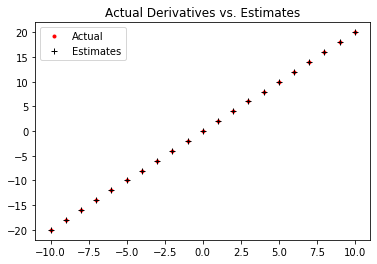

In [6]:
import matplotlib.pyplot as plt

h = 0.001
xs = range(-10, 11)

actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
# 실제 도함수 그래프(빨간색 점)
plt.plot(xs, actuals, 'r.', label='Actual') 
# 근사치 그래프(검은색 +)
plt.plot(xs, estimates, 'k+', label='Estimates')
plt.legend()
plt.show()

### 다변수 함수의 그레이디언트 계산

다변수 함수의 그레이디언트는 매개변수 각가에 대한 **편도함수**(partial derivative)로
구성된 벡터로 구성된다.
예를 들어, $i$번째 편도함수는 $i$번째 매개변수를 제외한 다른 모든 매개변수를 고정하는 
방식으로 계산된다. 

$f$가 다변수 함수(다차원 함수)일 때, 점 $\mathbf{x}$에서의 $i$번째 도함수는 다음과 같다.

$$
\frac{\partial}{\partial x_i}f(\mathbf x) = \lim_h \frac{f(\mathbf{x}_h) - f(\mathbf x)}{h}
$$

여기서 $\mathbf{x}_h$는 $\mathbf x$의 $i$번째 항목에 $h$를 더한 벡터를 가리킨다.
즉, $\frac{\partial}{\partial x_i} f(\mathbf x)$ 는 $x_i$가 아주 조금 변할 때 
$f(\mathbf x)$가 변하는 정도, 즉
함수 $f$의 $x$에서의 $i$번째 **편미분값**이 된다.
이때 함수 $\frac{\partial}{\partial x_i}f$ 를 함수 $f$의 $i$번째 **편도함수**라 부른다.

아래 코드에서 정의된 `partial_difference_quotient`는 주어진 다변수 함수의 $i$번째
편도함수의 근사치를 계산해주는 함수이다.
사용되는 매개변수는 `difference_quotient()` 함수의 경우와 거의 같다.
다만 `i`번째 편도함수의 근사치를 지정하기 위해 `i`번째 매개변수에만 `h`가 더해짐에 주의하라.

In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """
    함수 f의 v에서의 i번째 편미분값 근사치 계산
    f: 편미분 대상 함수
    v: 인자 벡터
    i: i번째 인자를 가리킴
    h: 인자 v_i가 변하는 정도
    """
    
    # v_i에 대해서만 h 더한 벡터
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h    

다음 `estimate_gradient()` 함수는 편미분 근사치를 이용하여 
그레이디언트의 근사치에 해당하는 벡터를 리스트로 계산한다. 
근사치 계산에 사용된 `h`의 기본값은 0.0001이다.

In [8]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

#### 주의사항

그레이디언트를 두 개의 함수값의 차이를 이용하여 근사치로 계산하는 방식은 계산 비용이 크다.
그레이디언트를 계산할 때마다 `f`를 두 번 호출해야 하기 때문이다. 
따라서 앞으로는 그레이디언트 함수가 수학적으로 쉽게 계산되는 경우만을 
사용하여 경사하강법의 용도를 살펴볼 것이다.

## 핵심 3: 경사하강법과 선형회귀

In [ ]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

# "Using the Gradient" example

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0


# First "Using Gradient Descent to Fit Models" example

from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


# Minibatch gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


# Stochastic gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"